# Logistic Regression
---

## Telecom company customer churn case study

#### Problem Statement:

Consider a Telecom company that has a dataset containing the details of customers in the Delhi region. 
It wishes to use the data to optimise and predict customer churn.

Essentially, the company wants —


- To identify whether the customer will churn to other Telecom provider.

- To know the accuracy of the model, i.e. how well these variables can predict customer churn.

**So interpretation is important!**

In [1]:
#Suppress warnings
import warnings
warnings.filterwarnings("ignore")
import sys
import os

In [2]:
# getting the name of the directory
# where the this file is present.
current = os.path.dirname(os.path.realpath("ml_utils.py"))
  
# Getting the parent directory name
# where the current directory is present.
parent = os.path.dirname(current)
  
# adding the parent directory to 
# the sys.path.
sys.path.append(parent)

In [3]:
from ml_utils import *

In [4]:
#Display settings
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

pd.set_option('display.max_columns', None)

--------

## 1. Import the dataset

The dataset is split across `3 csv files`. We import each file and `merge them using customerID as unique column`.

In [5]:
# Load churn data
churn_data = pd.read_csv("churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Load customer data
customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
#Load internet data
internet_data = pd.read_csv("internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


----------

# 2. Combining all data files into one consolidated dataframe

In [8]:
# Merging on 'customerID'
temp_df = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [9]:
# Final dataframe with all predictor variables
df = pd.merge(temp_df, internet_data, how='inner', on='customerID')

In [10]:
#Visualize the consolidated dataframe
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


-----------

**Shape of the Dataset:**

(7043, 21)
-----------------




**Number of rows and columns in the Dataset:**

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')
-----------------




**Basic information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


**Percentage null values in the Dataset:**

StreamingMovies     0.0
gender              0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
SeniorCitizen       0.0
StreamingTV         0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
customerID          0.0
dtype: float64
-----------------




**Total number of duplicated rows in the Dataset:**

0
-----------------




**Categorical columns in the Dataset:**

['PaymentMethod', 'gender', 'Dependents', 'PaperlessBilling', 'TotalCharges', 'DeviceProtection', 'Contract', 'TechSupport', 'PhoneService', 'Churn', 'InternetService', 'StreamingMovies', 'OnlineBackup', 'OnlineSecurity', 'StreamingTV', 'customerID', 'MultipleLines', 'Partner']
-----------------




**Unique values across categorical columns in the Dataset:**

Unique values in the column:  PaymentMethod
{'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522}
-----------------


Unique values in the column:  gender
{'Male': 3555, 'Female': 3488}
-----------------


Unique values in the column:  Dependents
{'No': 4933, 'Yes': 2110}
-----------------


Unique values in the column:  PaperlessBilling
{'Yes': 4171, 'No': 2872}
-----------------


Unique values in the column:  TotalCharges
{'20.2': 11, ' ': 11, '19.75': 9, '19.9': 8, '20.05': 8, '19.65': 8, '45.3': 7, '19.55': 7, '20.25': 6, '19.45': 6, '20.15': 6, '20.3': 5, '20.45': 5, '50.15': 4, '69.65': 4, '44.4': 4, '69.9': 4, '19.4': 4, '20.5': 4, '19.95': 4, '69.95': 4, '19.3': 4, '74.7': 4, '19.5': 4, '75.3': 4, '19.2': 4, '70.6': 4, '19.85': 4, '69.6': 4, '20.4': 4, '49.9': 4, '44': 4, '20.35': 4, '85': 3, '24.8': 3, '2317.1': 3, '50.45': 3, '80.55': 3, '305.55': 3, '45.7': 3, '19.1': 3, '50.75': 3, '70.15': 3, '74.6': 3, '24.4'

**Visual representation of the Dataset:**

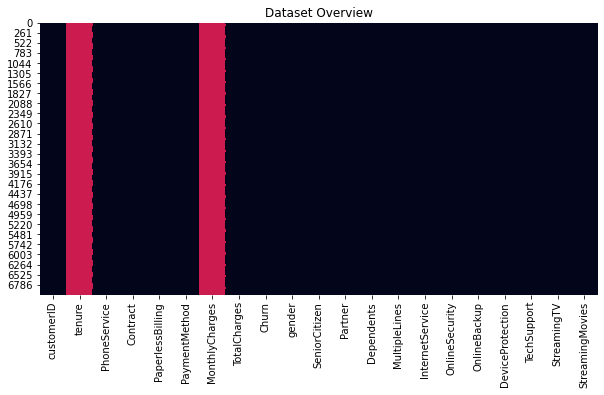

 Categorical   Numerical   NaN 


In [11]:
#Get an overview of the Dataset
df_overview(df, max_cat=20, figsize=(10,5))

In [12]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [13]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

## 3. Data Pre-processing
-------

**3.1 Binary Mapping**

In [14]:
#Add Binary mapping to categorical columns
col_list = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']
val_list = ["No", "Yes"]
df = add_mapping(df, col_list, val_list)

**3.2 Dummy variables for categorical data with > 2 entries**

In [15]:
#Get dummy variables
col_list = ['Contract', 'PaymentMethod', 'gender', 'InternetService']
df = add_dummies(df, col_list, dropx=True)

         Contract  Contract_One year  Contract_Two year
0  Month-to-month                  0                  0
1        One year                  1                  0
2  Month-to-month                  0                  0
3        One year                  1                  0
4  Month-to-month                  0                  0
               PaymentMethod  PaymentMethod_Credit card (automatic)  \
0           Electronic check                                      0   
1               Mailed check                                      0   
2               Mailed check                                      0   
3  Bank transfer (automatic)                                      0   
4           Electronic check                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0            

In [16]:
df.loc[:,["MultipleLines"]]

,MultipleLines
0,No phone service
1,No
2,No
3,No phone service
4,No
...,...
7038,Yes
7039,Yes
7040,No phone service
7041,Yes


In [17]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [18]:
#Get dummy variables
col_list = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
df = add_dummies(df, col_list, dropx=True)

      MultipleLines  MultipleLines_No phone service  MultipleLines_Yes
0  No phone service                               1                  0
1                No                               0                  0
2                No                               0                  0
3  No phone service                               1                  0
4                No                               0                  0
  OnlineSecurity  OnlineSecurity_No internet service  OnlineSecurity_Yes
0             No                                   0                   0
1            Yes                                   0                   1
2            Yes                                   0                   1
3            Yes                                   0                   1
4             No                                   0                   0
  OnlineBackup  OnlineBackup_No internet service  OnlineBackup_Yes
0          Yes                                 0                 1
1 

In [19]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**3.3 Convert TotalCharges to Integer from String**

In [20]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [21]:
#The varaible was imported as a string we need to convert it to float
#telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce') 

## 4. Check for outliers
-------

In [22]:
# Checking for outliers in the continuous variables
list(df.select_dtypes('number')) 

['tenure',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'gender_Male',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes']

In [23]:
# Checking for outliers in the continuous variables
df_num = df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

## 5. Check for missing values
-------

In [25]:
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

TotalCharges                             0.156183
StreamingMovies_Yes                      0.000000
StreamingMovies_No internet service      0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No phone service           0.000000


In [26]:
# Removing NaN TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

In [27]:
# Checking percentage of missing values after removing the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

## 6. Drop select columns

In [28]:
#Drop customerID column
df = drop_col(df, ['customerID'])

## 7. Test Train Split

In [29]:
#Split the train and test data
df_train, df_test = df_partitioning(df, test_size=0.3, random_state=23, shuffle=True)
print(df_train.shape)
print(df_test.shape)

(4922, 31)
(2110, 31)


## 8. Feature Scaling

In [30]:
df.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
#Select Numerical Columns to be scaled
num_vars = ['tenure','MonthlyCharges','TotalCharges']
df_train, df_test = scaling(df_train, df_test, num_vars)

In [32]:
# Putting response variable to y
y_train = df_train.pop('Churn')
X_train = df_train

In [33]:
# Putting response variable to y
y_test = df_test.pop('Churn')
X_test = df_test

In [34]:
### Checking the Churn Rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

We have almost `27% Churn rate`

## 9. Correlation matrix

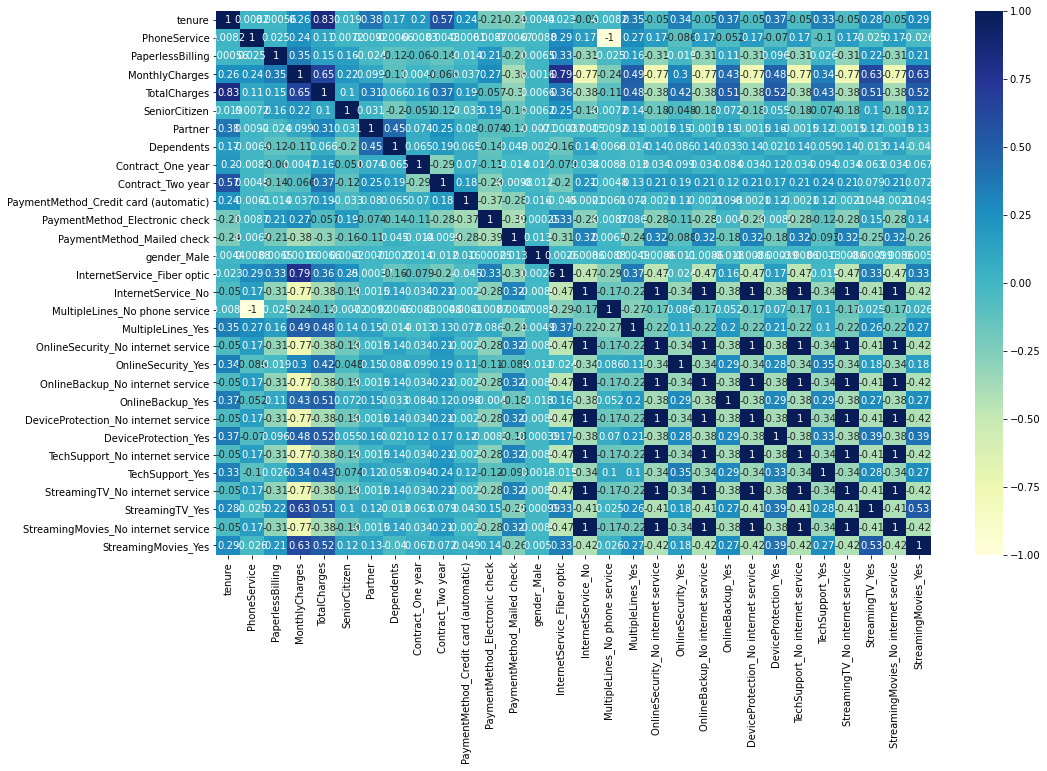

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated
corr_matrix(X_train)

In [36]:
#Drop highly correlated columns from X_train
X_train = X_train.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
                       'StreamingTV_No internet service','StreamingMovies_No internet service'], 1)

In [37]:
#Drop highly correlated columns from X_test
X_test = X_test.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
                       'StreamingTV_No internet service','StreamingMovies_No internet service'], 1)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

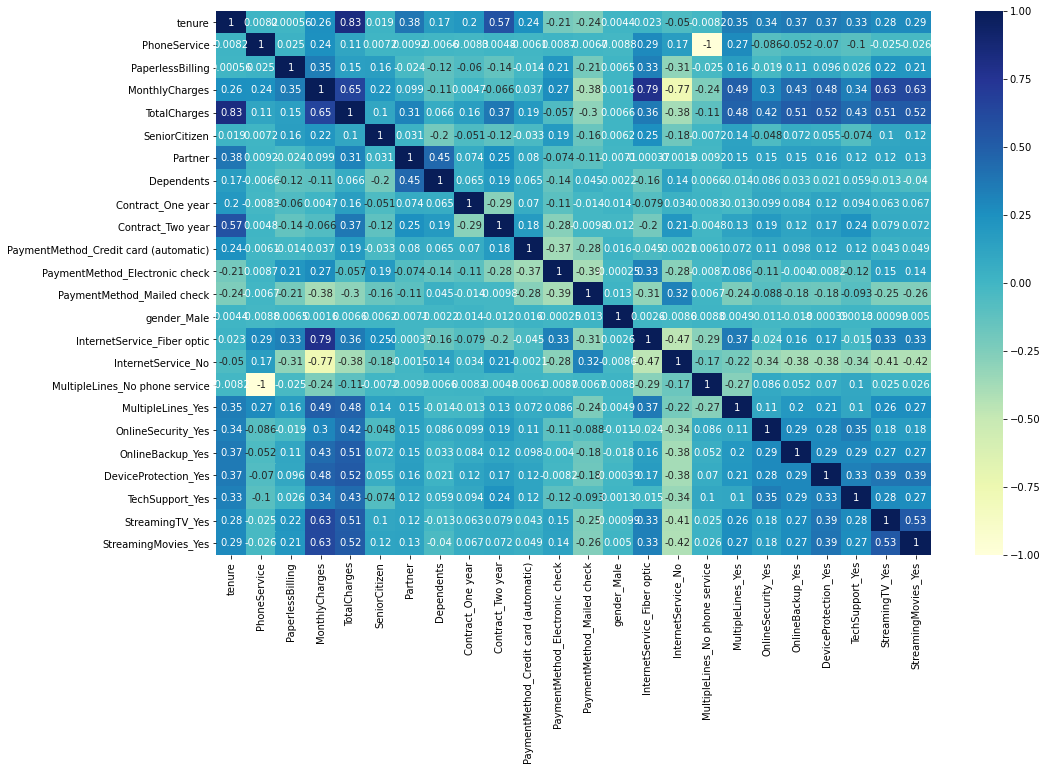

In [38]:
corr_matrix(X_train)

## 10. Model Building

In [39]:
# Logistic regression model
logisticRegr = linear_model.LogisticRegression()

In [40]:
#Fit the model on training set
logisticRegr.fit(X_train, y_train)

LogisticRegression()

### 10.1 Model Prediction

In [50]:
#Make predictions on the test set
y_test_pred = logisticRegr.predict(X_test)

### 10.2 Model Evaluation

**On the Train set**

In [51]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_train, y_train)
print(round(score,6))

0.807802


**On the Test set**

In [52]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(round(score,6))

0.804739


**Confustion Matrix**

In [62]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[1386  137]
 [ 275  312]]


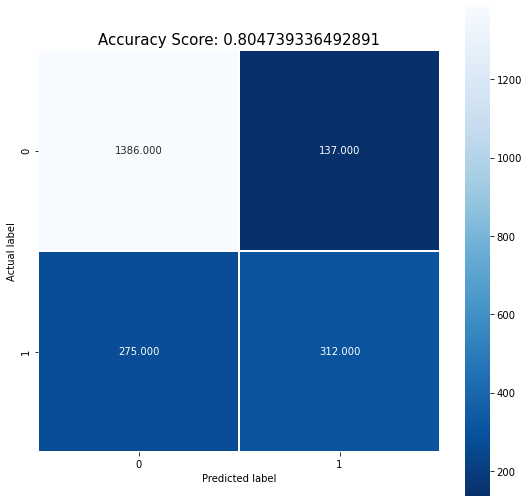

In [63]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**Sensitivity and Specificity**

In [68]:
#True Positive
TP = confusion_matrix[1][1]
print("True Positive: ", TP)

#True Negative
TN = confusion_matrix[0][0]
print("True Negative: ", TN)

#False Positive
FP = confusion_matrix[0][1]
print("False Positive: ", FP)

#False Negative
FN = confusion_matrix[1][0]
print("False Negative: ", FN)

True Positive:  312
True Negative:  1386
False Positive:  137
False Negative:  275


In [69]:
#Calculate True Positive Rate/Sensitivity/Recall
print(TP/float(TP + FN))

0.5315161839863713


In [70]:
#Calculate Specificity/True Negative Rate
print(TN/float(TN + FP))

0.9100459619172685


In [74]:
#Calculate False Positive Rate
print(FP/float(TN + FP))

0.08995403808273145


**Results Summary**

In [58]:
#results summary
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1523
           1       0.69      0.53      0.60       587

    accuracy                           0.80      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [60]:
#F1-Score
metrics.f1_score(y_test, y_test_pred)

0.6023166023166022

**ROC Curve**

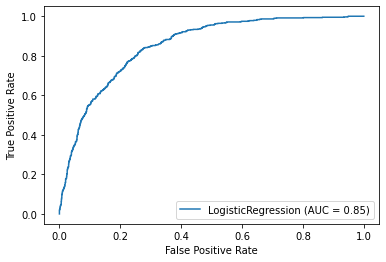

In [73]:
metrics.plot_roc_curve(X = X_test, y = y_test, estimator = logisticRegr)

**Cross-Validation**

In [47]:
scores = model_selection.cross_val_score(logisticRegr, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81744422 0.81135903 0.79268293 0.77642276 0.79471545 0.79268293
 0.81097561 0.80487805 0.81910569 0.82520325]


**GridSearch CV**

In [80]:
#List the parameters for GridSearch
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [82]:
#Initialize Logistic Regression model
logreg = linear_model.LogisticRegression()

In [84]:
clf = model_selection.GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)

In [85]:
#The GridSearchCV() function returns a LogisticRegression instance 
#(in this example, based on the algorithm that you are using), 
#which you can then train using your training set:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [86]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

Tuned Hyperparameters : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.8049534952753179


In [89]:
#Using the best fit model
logreg = linear_model.LogisticRegression(C = 0.1, 
                            penalty = 'l2', 
                            solver = 'liblinear')
logreg.fit(X_train,y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [91]:
# Use score method to get accuracy of model
score = logreg.score(X_train, y_train)
print(round(score,6))

0.806786


**Recursive Feature Elimination**

In [93]:
#Initialize Logistic Regression model
logreg = linear_model.LogisticRegression(random_state = 101)

In [96]:
rfecv = feature_selection.RFECV(estimator=logreg, step=1, cv=model_selection.StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=101), scoring='accuracy')

In [99]:
#Optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 13


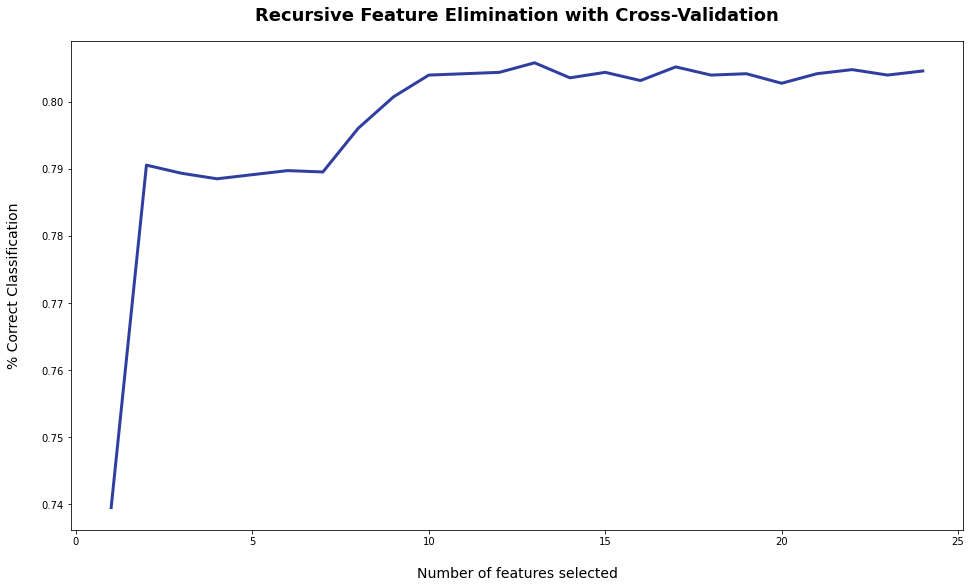

In [100]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [102]:
#Print model score
rfecv.score(X_train, y_train)

0.8084112149532711

In [110]:
#Display columns which are not important
print(np.where(rfecv.support_ == False)[0])

#Drop unimportant columns
# X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 3  5  6  7 10 12 13 19 20 21 22]


In [111]:
# Logistic regression model
logisticRegr = linear_model.LogisticRegression()

In [112]:
#Fit the model on training set
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [113]:
#Make predictions on the test set
y_test_pred = logisticRegr.predict(X_test)

In [114]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_train, y_train)
print(round(score,6))

0.808411


**On the Test set**

In [115]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(round(score,6))

0.80237
